In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#Dropping the Unnamed:0 column as it is of no use
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- There are large no outlier in Xlarge as STD is way more than mean
- There are large no outlier in small Bags, Total Bags as STD is way more than mean

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# Checking and treating missing values

In [15]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- Looks like there are no missing values in dataset

# EDA and Data Visualisation

In [16]:
con_df=df.select_dtypes(include=['float64','int64'])
con_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [17]:
con_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


# In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

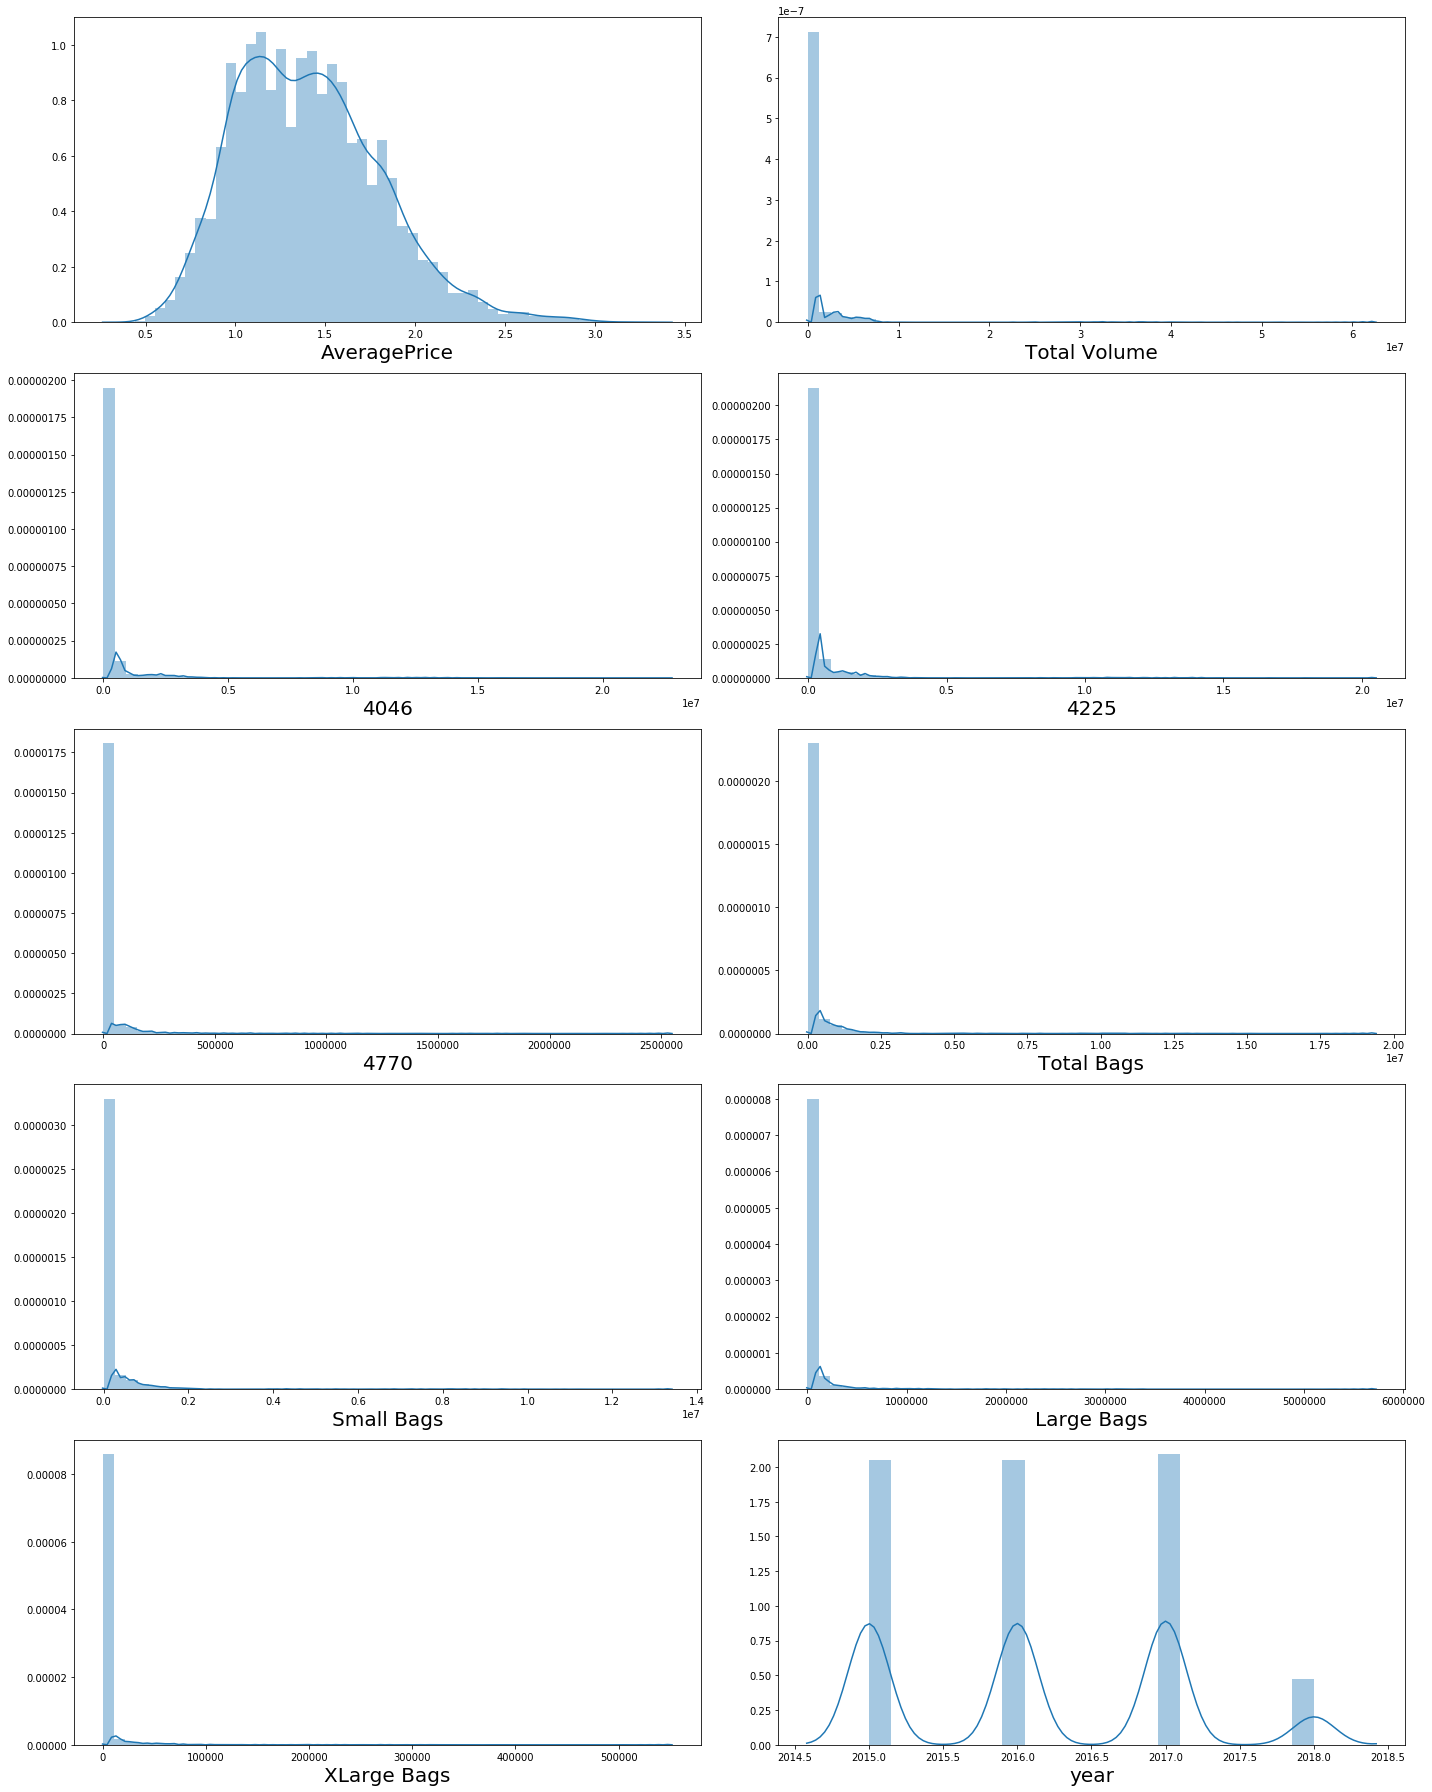

In [18]:
# PLoting distribution plot to see the how data is distributed
plt.figure(figsize=(20,25))
plotnumber=1
for column in con_df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(con_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- It appears that the data distribution in the average price ranges between 0.3 & 3.4 The upper values of the distribution are at 1.1 Most of the data is concentrated between 0.9 to 1.8.
- there is lot of skewness in most of columns, we need to treat that

In [19]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [20]:
#checking  the mean price at year of organic 

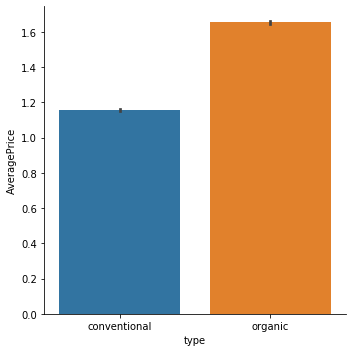

In [21]:
sns.factorplot(data=df,kind='bar',x='type',y='AveragePrice')

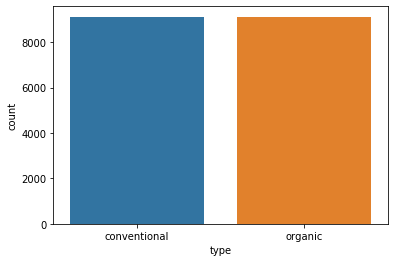

In [22]:
sns.countplot(x='type',data=df)

- looks like distribution of coventional and organic is almost same.

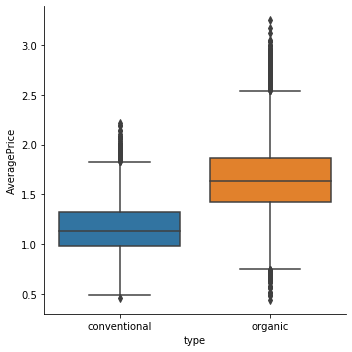

In [23]:
sns.factorplot(data=df,kind='box',x='type',y='AveragePrice')

- It looks like the ORGANIC price is expensive than conventional price.

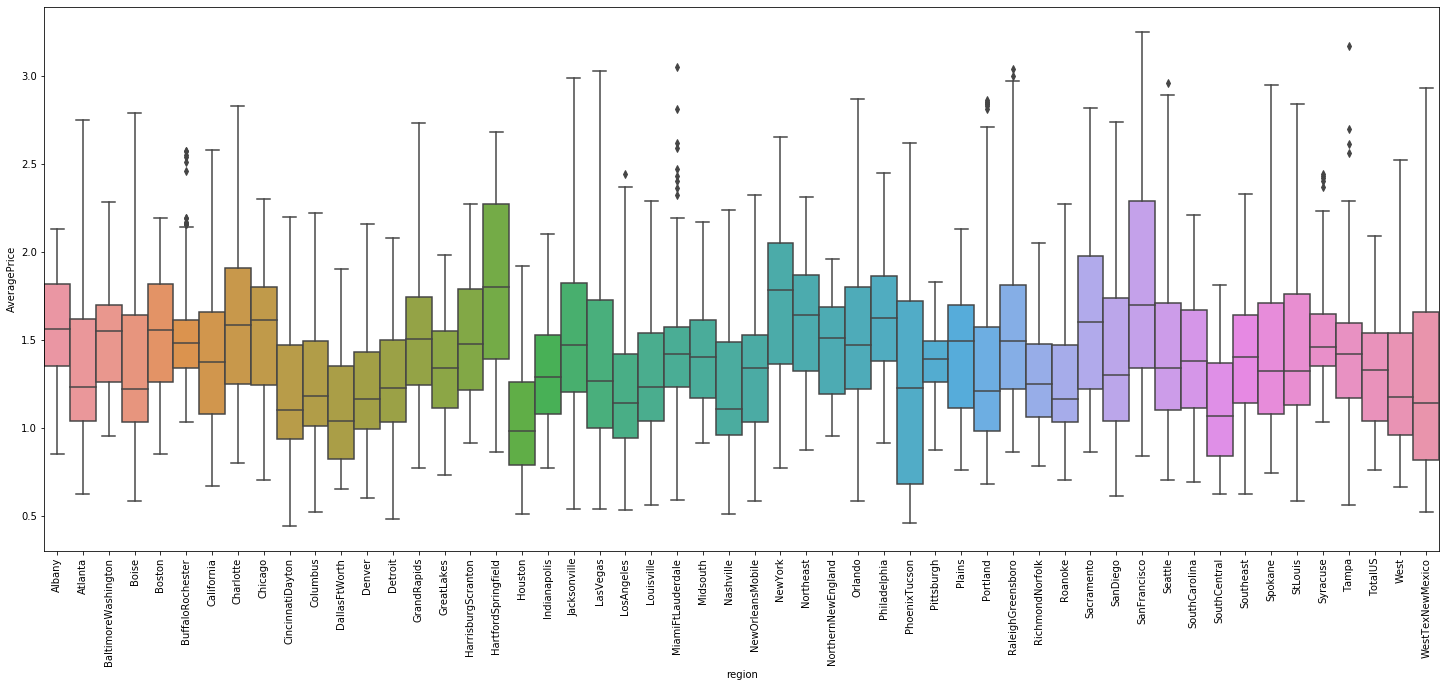

In [24]:
plt.figure(figsize=(25,10))
plt.xticks(rotation='vertical')
sns.boxplot(x='region',y='AveragePrice',width=1,whis=2,data=df)

- Regarding the prices relative to the regions, we find that San Francisco is the most expensive city to sell avocados in general, tucson is the cheapest area to sell.

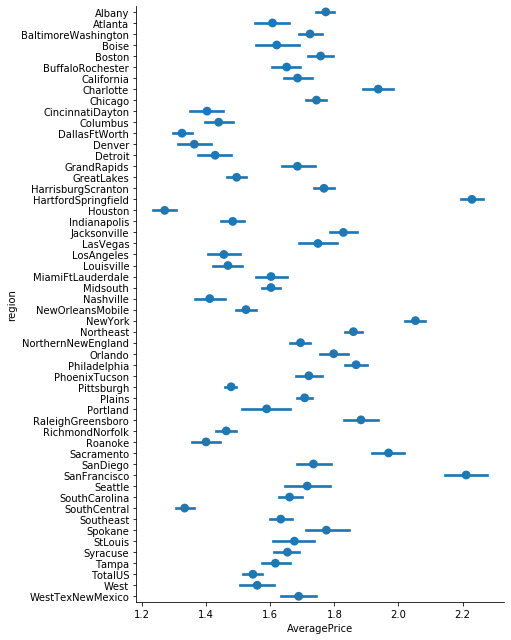

In [25]:
# now let see with respect to each type of avocado
 
organic=df[df['type'] == 'organic']
sns.factorplot(x='AveragePrice',y='region',data=organic ,size=9,aspect=0.8,join=False)



- price of organic is very less in Houston and high in San francisco

In [26]:
#checking  the mean price at year of organic type of avocado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

- Mean price was high in the year 2017

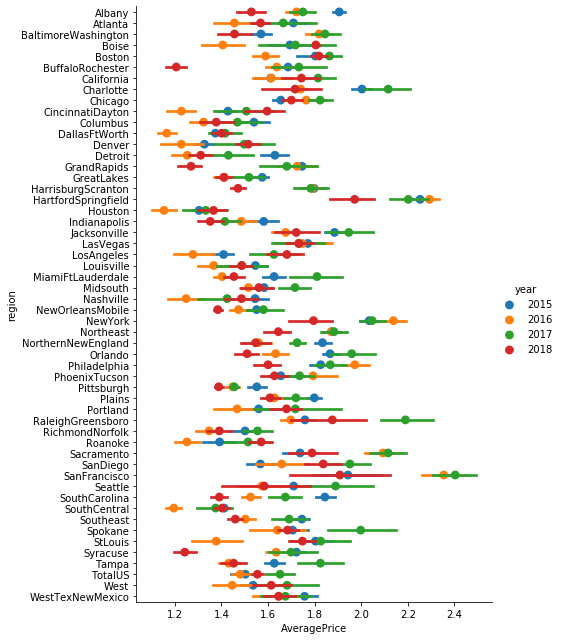

In [27]:
# now let see with respect to each type of avocado- covention
conventional=df[df['type'] == 'conventional']
sns.factorplot(x='AveragePrice',y='region',data=organic,hue='year' ,size=9,aspect=0.8,join=False)

In [28]:
#checking  the mean price at year of organic type of avocado
conventional.groupby('year')['AveragePrice'].mean()

year
2015    1.077963
2016    1.105595
2017    1.294888
2018    1.127886
Name: AveragePrice, dtype: float64

- Mean price of coventional was high in the year 2017

In [29]:
#checking how many avocado where sell year wise
df.groupby('year')['type'].value_counts() 

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

- In above, I am finding that year 2017 is aggressive year where avocado price is higher as compared to other year and 2016 is at second number.
- The year 2018 was very less productive year

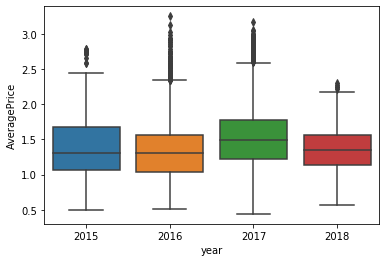

In [30]:
# now let check the relation of avg price with year
sns.boxplot(x='year',y='AveragePrice',data=df)

- price is increasing and decreasing in alternate year 

# Now we will find the relationship between price and months, since we have the date, we can extract the months to find the relationship with prices.

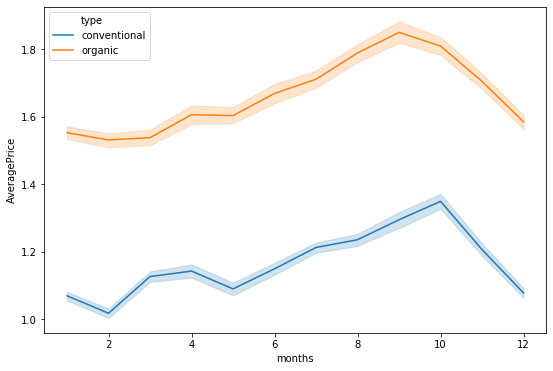

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df['months']= df['Date'].map(lambda x: x.month)
plt.figure(figsize=(9,6))
sns.lineplot(x='months',y='AveragePrice',data=df, hue='type')

average price is high in 9th  and 10th months 

# Most of the columns in dataset is right skewed

- To make the column as normal distributed we will use log transformation

In [32]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
months           0.106617
dtype: float64

- <b>Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative.</b>

- A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
- A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
- A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

In [34]:
# making the skew lessfor better prediction and ploting normal distribution.

skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
        

In [35]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
months          0.106617
dtype: float64

- We have removed the skewness to great extent.
- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

# Checking for the outlier using boxplot

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

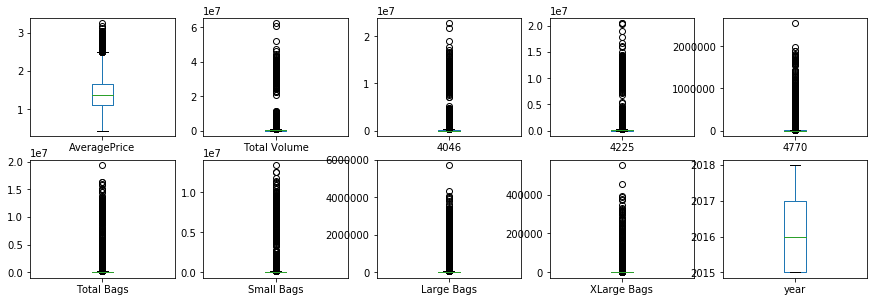

In [39]:
con_df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

- We hav deteted the outlier , now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values.
- we are using  zscore

In [52]:
df_dummies=pd.get_dummies(df['type'],drop_first=True)
df= df.join(df_dummies)


KeyError: 'type'

In [44]:
# using the label encoding to encode the region column.
label_encoding=LabelEncoder()
#Encoding the region column
df.iloc[:,12]=label_encoding.fit_transform(df.iloc[:,12].values)

In [51]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


In [43]:
df.iloc[:,12]

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
months          18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [45]:
# calculate the zscore
from scipy import stats
z=np.abs(stats.zscore(con_df))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 0.22235202 0.17557961 1.22128204]
 [0.13901962 0.23042664 0.23110251 ... 0.22233464 0.17557961 1.22128204]
 [1.18206895 0.21208462 0.23100731 ... 0.22231148 0.17557961 1.22128204]
 ...
 [1.15237477 0.24233073 0.2306933  ... 0.22256082 0.17557961 1.97050371]
 [1.30138182 0.24162464 0.2304279  ... 0.2225293  0.17557961 1.97050371]
 [0.53151208 0.24125273 0.22934712 ... 0.22262764 0.17557961 1.97050371]]


In [46]:
threshold=3
print(np.where(z<3))
print(con_df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([0, 1, 2, ..., 7, 8, 9], dtype=int64))
(18249, 10)


In [47]:
df_new=con_df[(z<3).all(axis=1)]

In [49]:
print(con_df.shape)
print(df_new.shape)
df=df_new
print('shape after removing the outlier',df.shape)

(18249, 10)
(17651, 10)
shape after removing the outlier (17651, 10)


In [50]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018


# Finally let’s find heatmap

[]

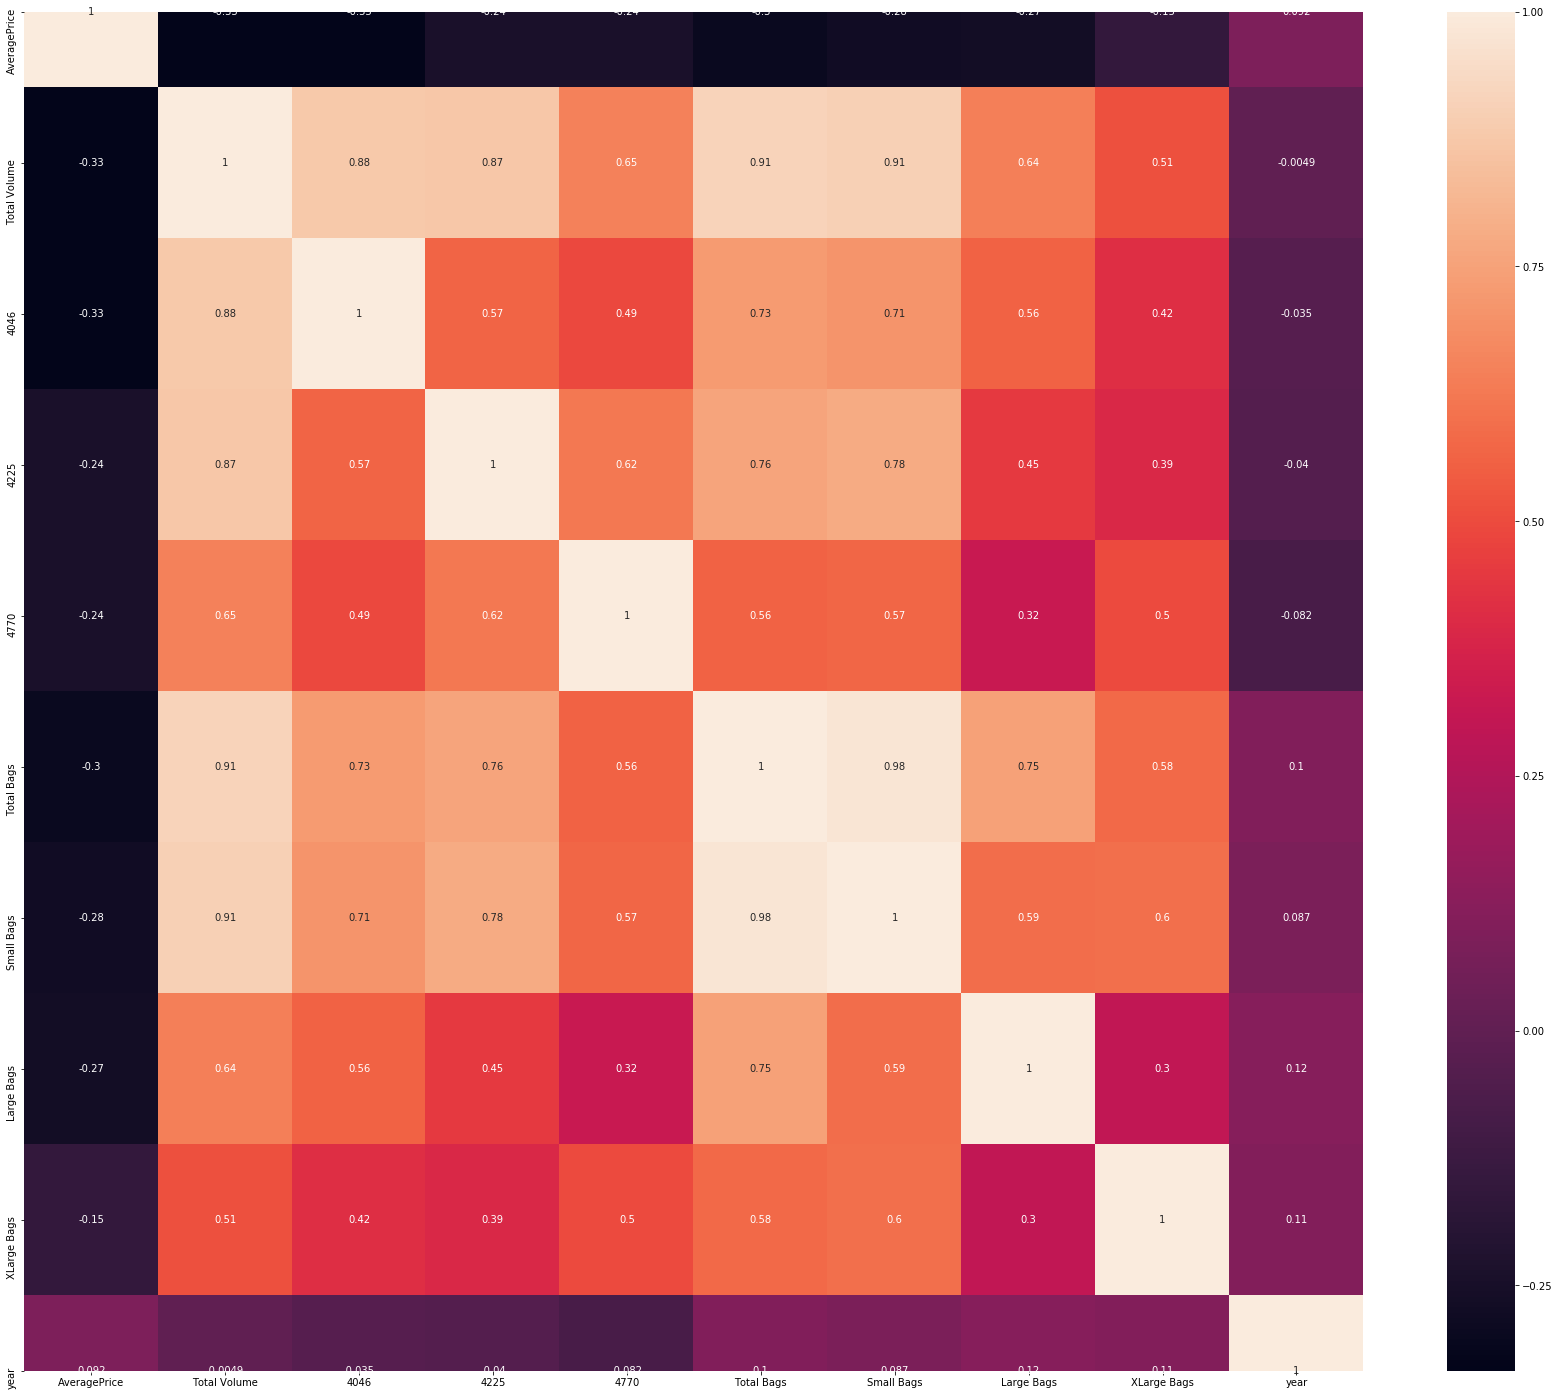

In [55]:
data=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(data,annot=True,cbar=True)
plt.plot()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 10 columns):
AveragePrice    17651 non-null float64
Total Volume    17651 non-null float64
4046            17651 non-null float64
4225            17651 non-null float64
4770            17651 non-null float64
Total Bags      17651 non-null float64
Small Bags      17651 non-null float64
Large Bags      17651 non-null float64
XLarge Bags     17651 non-null float64
year            17651 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.5 MB


In [58]:
#Split the data into independent and dependent 
X=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [63]:
#Normalize the data using Standard Scaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [66]:
#Create the loop  for differnt model
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0

for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_sc=r2_score(y_test,pre)
        print('R2 score correspond to random state',r_state, 'is',r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score=r2_sc
            final_state= r_state
            final_model =i
            
print()
print()
print()
print()
print("max r2 score correspond to random state",final_state, 'is',max_r2_score,'and model is ',final_model)

R2 score correspond to random state 40 is 0.5780878243439349
R2 score correspond to random state 40 is 0.7311024067115323
R2 score correspond to random state 40 is 0.45913645503193734
R2 score correspond to random state 40 is 0.14001552888635327
R2 score correspond to random state 40 is 0.6326808542457196
R2 score correspond to random state 41 is 0.5817361877285325
R2 score correspond to random state 41 is 0.7294076780812182
R2 score correspond to random state 41 is 0.4562191427304688
R2 score correspond to random state 41 is 0.14234469889346935
R2 score correspond to random state 41 is 0.6240763016922937
R2 score correspond to random state 42 is 0.5896675057386961
R2 score correspond to random state 42 is 0.7103724195781989
R2 score correspond to random state 42 is 0.4351391804027286
R2 score correspond to random state 42 is 0.13338651273885826
R2 score correspond to random state 42 is 0.6180637335631366
R2 score correspond to random state 43 is 0.6100909448579792
R2 score correspond 

max r2 score correspond to random state 43 is 0.7425271958588129 and model is  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Hyperparamter tunning

In [68]:
#checking fo the best parameter for predection of KNeighborsRegressoralgo using Gridsearch CV
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=43)
KN=KNeighborsRegressor()
grid_param={ 'n_neighbors'  : range(1,30)}
grid_search=GridSearchCV(KN,grid_param)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'n_neighbors': 5}

In [71]:
KNN=KNeighborsRegressor(n_neighbors= 5)
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
r2_sc=r2_score(y_test,pred)
print("r2 score is :",r2_sc)

r2 score is : 0.7425271958588129


In [75]:
# print("MSE",mean_squared_error(y_test,pred))

print("RMSE",mean_squared_error(y_test,pred)**0.5)

print("MAE",mean_absolute_error(y_test,pred))

print("R squared",r2_score(y_test,pred))

RMSE 0.19629022570649934
MAE 0.1360942669385905
R squared 0.7425271958588129


In [73]:
#Let calculate the Adj R2 to see if model is overfitting or not
#Let's write a function to calculate Ajd R2
def ajd_r2(y_test,pred,p):
    r2=r2_score(y_test,pred)
    n=len(y_test)
    return 1-(1-r2)*(n-1)/(n-p-1)


In [74]:
ajd_r2(y_test,pred,X.shape[1])

0.7420009057753991

- looks like our model is not overfitting as r2 and adj r2 score almost same 

# Cross-Validation in sklearn

In [76]:
cross_val=cross_val_score(KNN,x_train,y_train,cv=10,scoring='r2')
cross_val.mean()

0.7100103278629237

- after doing the cross validation r2 score 71 % which is very close to our model score of 74%

Text(0, 0.5, 'Predicted')

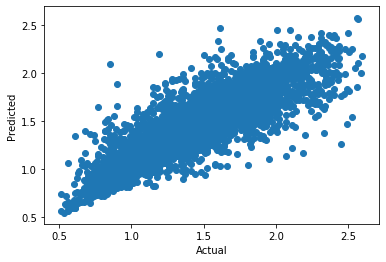

In [77]:
#checking the Actual and Predicted values using the scatter plot.
plt.scatter(x=y_test,y=pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")


- We can see there is linear graph.

In [78]:
#saving the final model
import pickle
with open( "modelfor prediction.sav",'wb') as f:
    pickle.dump(KNN,f)